In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [23]:
df=sns.load_dataset('iris')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df['species']=LabelEncoder().fit_transform(df['species'])

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
new_df=df[['sepal_length','sepal_width','species']]

In [9]:
new_df


,sepal_length,sepal_width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


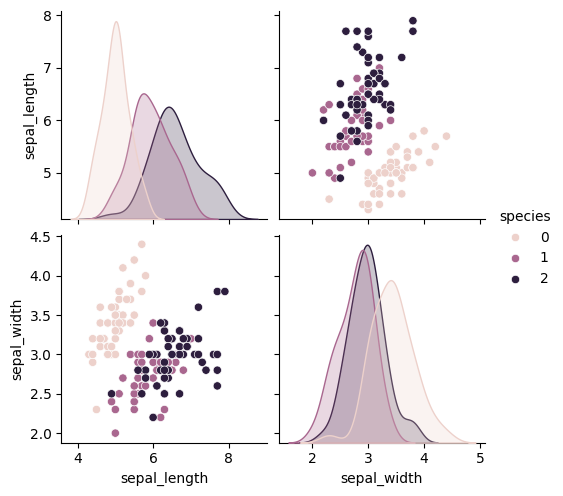

In [10]:
sns.pairplot(new_df,hue='species')
plt.show()

In [12]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

In [13]:
estimators=[('l1',clf1),('l2',clf2),('l3',clf3)]

In [14]:
x=new_df.drop('species',axis=1)
y=new_df['species']

In [34]:
xtr, xte, ytr, yte = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
for estimator in estimators:
  z=cross_val_score(estimator[1],x,y,cv=10,scoring='accuracy')
  print(np.mean(x))

4.450333333333334
4.450333333333334
4.450333333333334


In [36]:
vc=VotingClassifier(estimators=estimators)
z1=cross_val_score(vc,x,y,cv=10,scoring='accuracy')
print(np.mean(z1))

0.7666666666666666


In [37]:
vc=VotingClassifier(estimators=estimators,voting='soft')
z1=cross_val_score(vc,x,y,cv=10,scoring='accuracy')
print(np.mean(z1))

0.76


In [38]:
model=vc.fit(xtr,ytr)

In [39]:
predict=model.predict(xte)

In [41]:
accuracy_score=accuracy_score(yte,predict)


In [42]:
print("accracy=",accuracy_score)

accracy= 0.8333333333333334


In [46]:
d=[]

while True:
    try:
        d1 = float(input("Enter the length of sepal: "))
        break # Exit the loop if conversion is successful
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Use a loop to ensure valid float input for sepal width
while True:
    try:
        d2 = float(input("Enter the width of sepal: "))
        break # Exit the loop if conversion is successful
    except ValueError:
        print("Invalid input. Please enter a valid number.")
d.append(d1)
d.append(d2)

d_array = np.array(d).reshape(1, -1)


predict=model.predict(d_array)

if predict==0:
  print("setosa")
elif predict==1:
  print("versicolor")
else:
  print("virginica")

Enter the length of sepal: 5
Enter the width of sepal: 5
setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
